In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run PC

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listAlgorithms()

fas
fask
fci
fges
fges-mb
fofc
ftfc
gfci
glasso
imgs_cont
imgs_disc
lingam
mbfs
mgm
mimbuild
multi-fask
pc-all
r-skew
r3
rfci
rfci-bsc
skew
ts-fci
ts-gfci
ts-imgs


In [5]:
tetrad.listIndTests()

bdeu-test
cci-test
cg-lr-test
chi-square-test
d-sep-test
disc-bic-test
fisher-z-test
g-square-test
kci-test
mnlrlr-test
mvplr-test
prob-test


In [6]:
tetrad.getAlgorithmParameters(algoId = 'pc-all', testId = 'fisher-z-test')

stableFAS: In Colombo, D., & Maathuis, M. H. (2014, Order-independent constraint-based causal structure learning, The Journal of Machine Learning Research, 15(1), 3741-3782), a modification of the adjacency search of PC was proposed that results in invariance under order permutations of the variables in the data. If this parameter is set to ‘Yes’, this version of the PC adjacency search is used. (java.lang.Boolean) [default:true]
concurrentFAS: Various versions of the PC adjacency search lend themselves to concurrent processing—that is, doing different independence tests in parallel to speed up the processing. If this parameter is set to ‘Yes’, and this option is available, it will be used. (java.lang.Boolean) [default:false]
colliderDiscoveryRule: For variants of PC, one may choose from one of three different ways for orienting colliders. One may look them up from sepsets, as in the original PC, or estimate them conservatively, as from the Conservative PC algorithm, or by choosing the

In [7]:
tetrad.run(algoId = 'pc-all', dfs = df, testId = 'fisher-z-test', 
           fasRule = 2, depth = 2, conflictRule = 1, concurrentFAS = True,
           useMaxPOrientationHeuristic = True, verbose = True)

#### PC Continuous' Result's Nodes

In [8]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### PC Continuous' Result's Edges

In [9]:
tetrad.getEdges()

['TangibilityCondition --- Sympathy',
 'Sympathy --- Impact',
 'Imaginability --- Impact']

#### Plot The Result's Graph

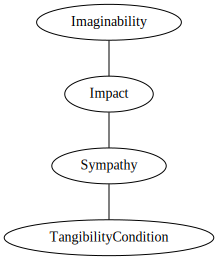

In [10]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [11]:
pc.stop_vm()